In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [2]:
data = pd.read_csv('breast_cancer_DS.csv')
data.head()

,id,feature_names,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,B,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(59999, 32)

In [4]:
data.describe

<bound method NDFrame.describe of              id feature_names  Radius_mean  Texture_mean  perimeter_mean  \
0        842302             M    17.990000     10.380000      122.800000   
1        842517             M    20.570000     21.770000      132.900000   
2      84300903             M    19.690000     21.250000      130.000000   
3      84348301             B    11.420000     20.380000       77.580000   
4      84358402             M    20.290000     14.340000      135.100000   
...         ...           ...          ...           ...             ...   
59994    923902             B     6.726706     10.293783       94.016622   
59995    923006             M     8.701720     11.945545       89.798855   
59996    920956             B    13.521062     10.622689       92.679745   
59997    926954             M    12.138021     17.705976       82.093887   
59998    921981             B     8.511145     19.555397       72.631774   

       area_mean  smoothness_mean  compactness_mean  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       59999 non-null  int64  
 1   feature_names            59999 non-null  object 
 2   Radius_mean              59999 non-null  float64
 3   Texture_mean             59999 non-null  float64
 4   perimeter_mean           59999 non-null  float64
 5   area_mean                59999 non-null  float64
 6   smoothness_mean          59999 non-null  float64
 7   compactness_mean         59999 non-null  float64
 8   concavity_mean           59999 non-null  float64
 9   concave points_mean      59999 non-null  float64
 10  symmetry_mean            59999 non-null  float64
 11  fractal_dimension_mean   59999 non-null  float64
 12  radius_se                59999 non-null  float64
 13  texture_se               59999 non-null  float64
 14  perimeter_se          

In [6]:

data.isnull().sum()

id                         0
feature_names              0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## There is not a single null value present in this dataset 
### EDA
### Univariate Analysis 
### Data Imbalance

<AxesSubplot:xlabel='feature_names', ylabel='count'>

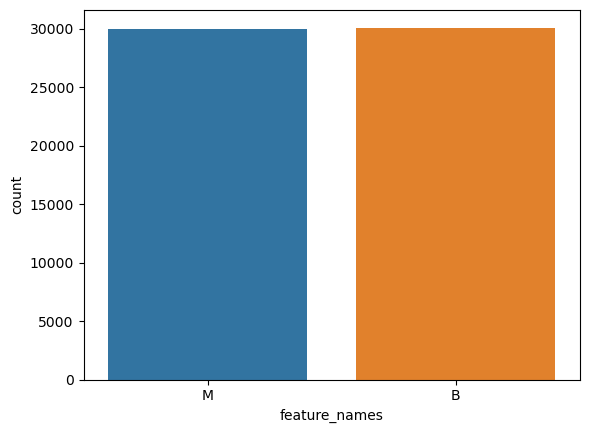

In [7]:
sns.countplot(x='feature_names', data=data)

In [8]:
data['feature_names'].value_counts()

B    30081
M    29918
Name: feature_names, dtype: int64

There is not much data imbalance present
So, we can proceed further without much caring for data imbalance
Or We can handle it by many ways - upsampling/downsampling
## We will go one by one feature
As 'Id' is not carrying any important information for our problem so it's better to drop it

In [9]:
data.drop(columns=['id'], inplace=True)

In [10]:
data.shape

(59999, 31)

In [11]:
diag_map = {
    "M":1,
    "B":0
}

data['feature_names'] = data['feature_names'].map(diag_map)

In [12]:
data[['feature_names']]

,feature_names
0,1
1,1
2,1
3,0
4,1
...,...
59994,0
59995,1
59996,0
59997,1


## Let's Plot the Histogram of remaining features to visualize their distribution

In [13]:
cols_name = list(data.columns)
cols_name

['feature_names',
 'Radius_mean',
 'Texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sushm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sushm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

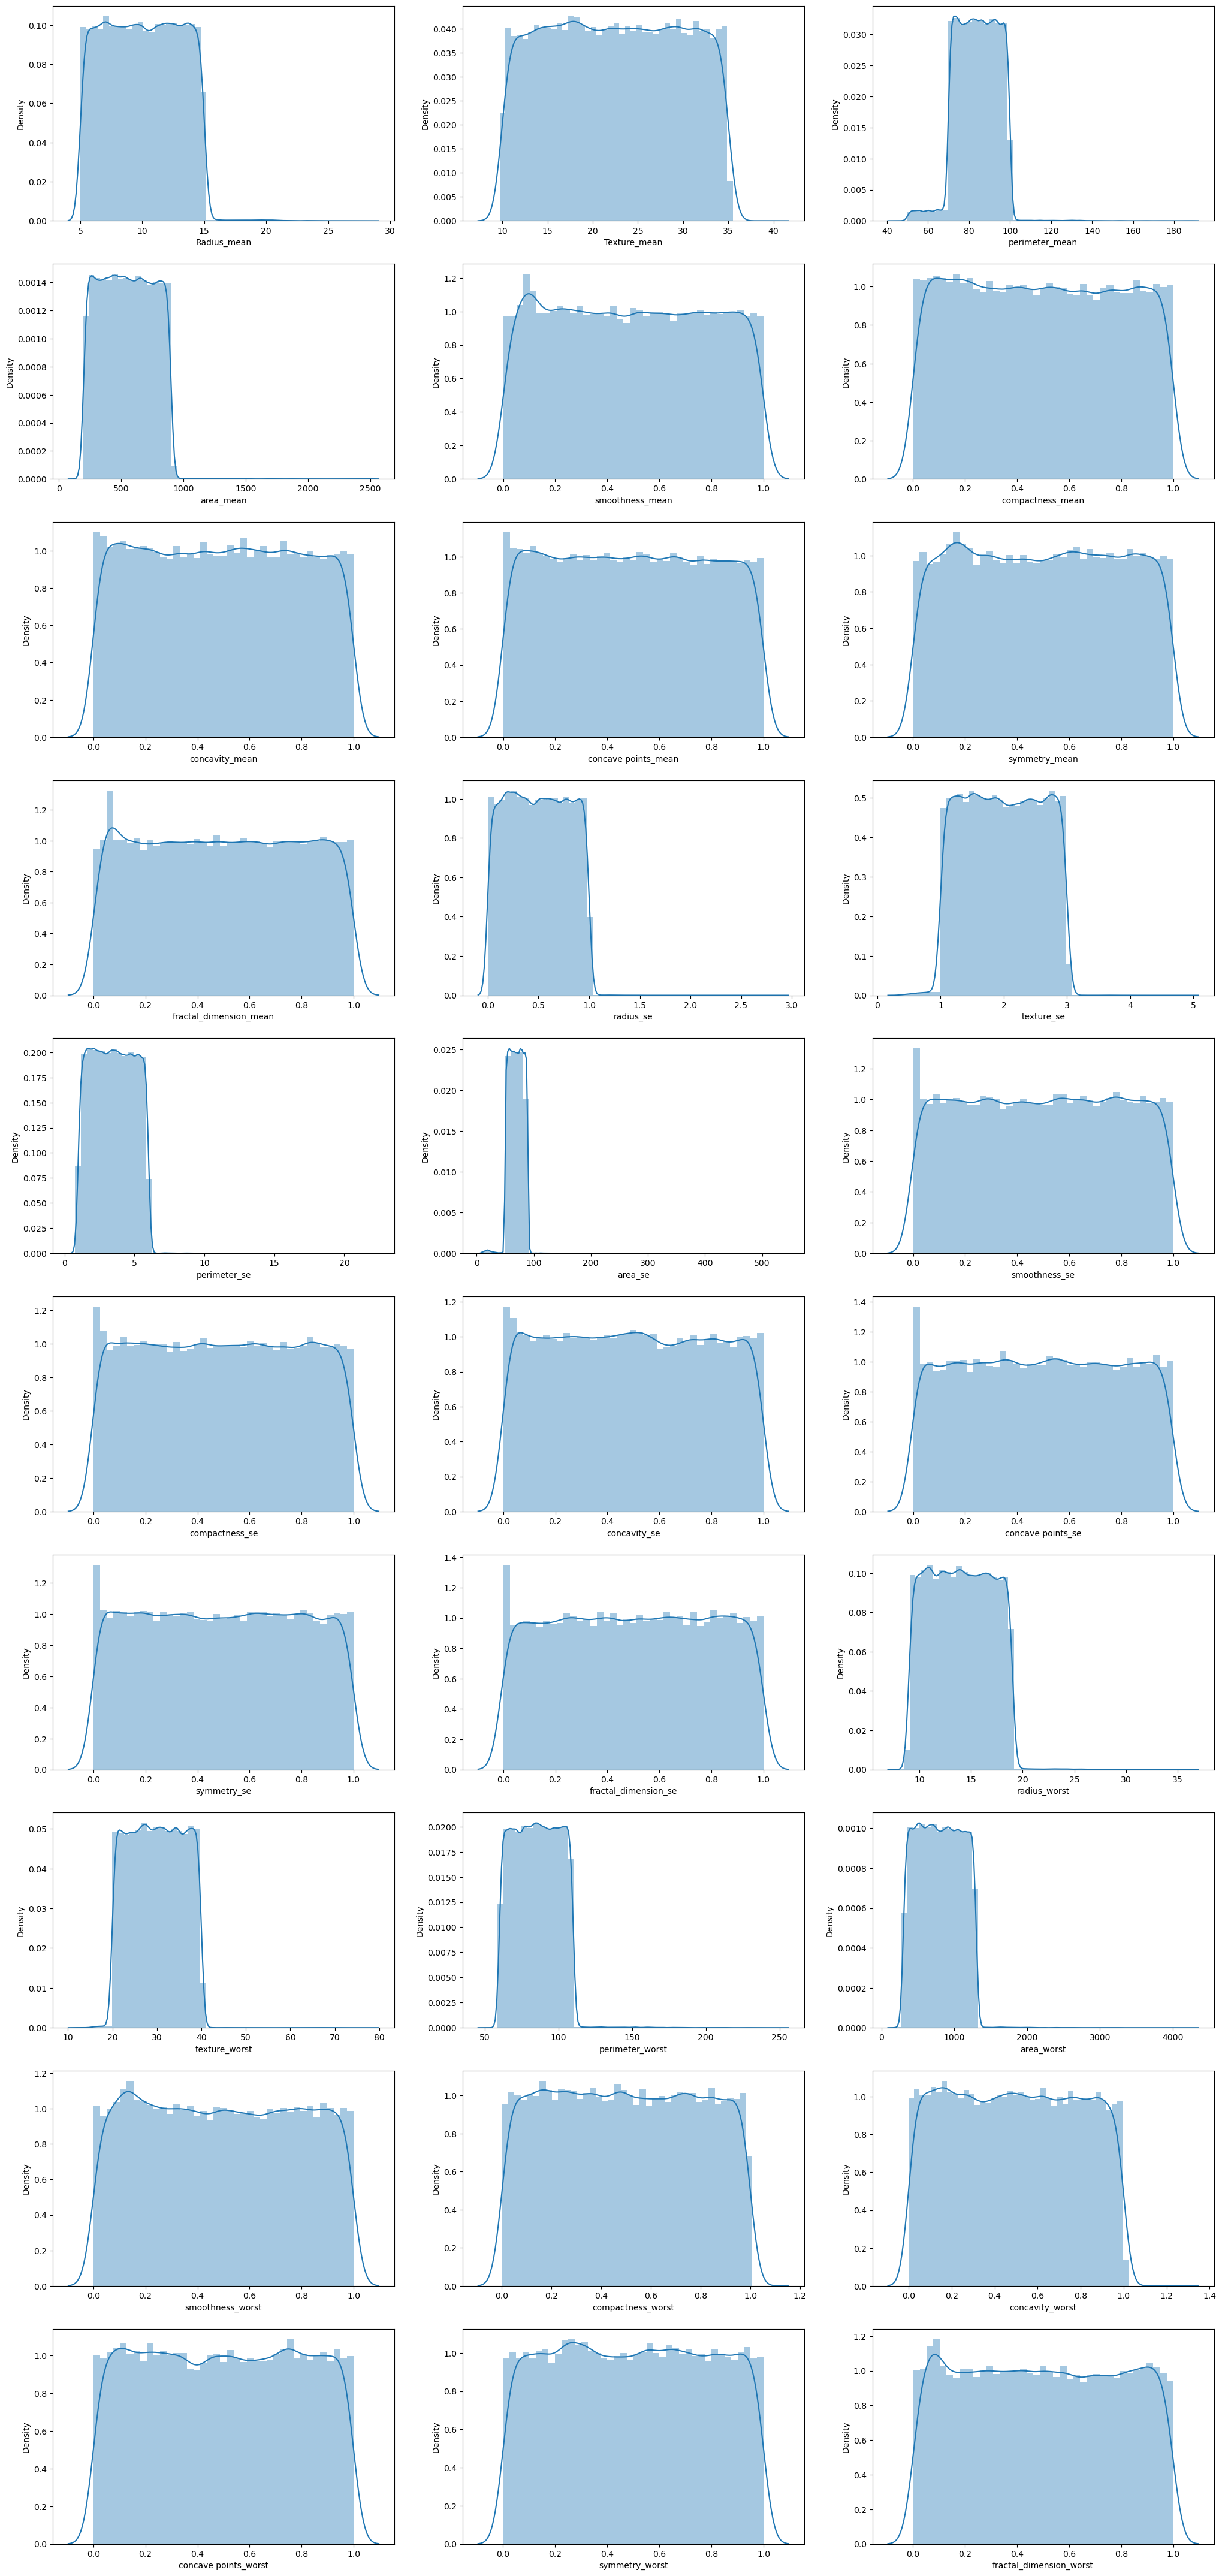

In [14]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.distplot(data[cols_name[i]])
plt.show()

Many attributes follow 'Normal / Gaussian Distribution'
Though many attributes have 'right skewness' present
We can use StandardScaler() to handle this data
## Let's plot Box plots for outliers visualization

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sushm\anaconda3\lib\si

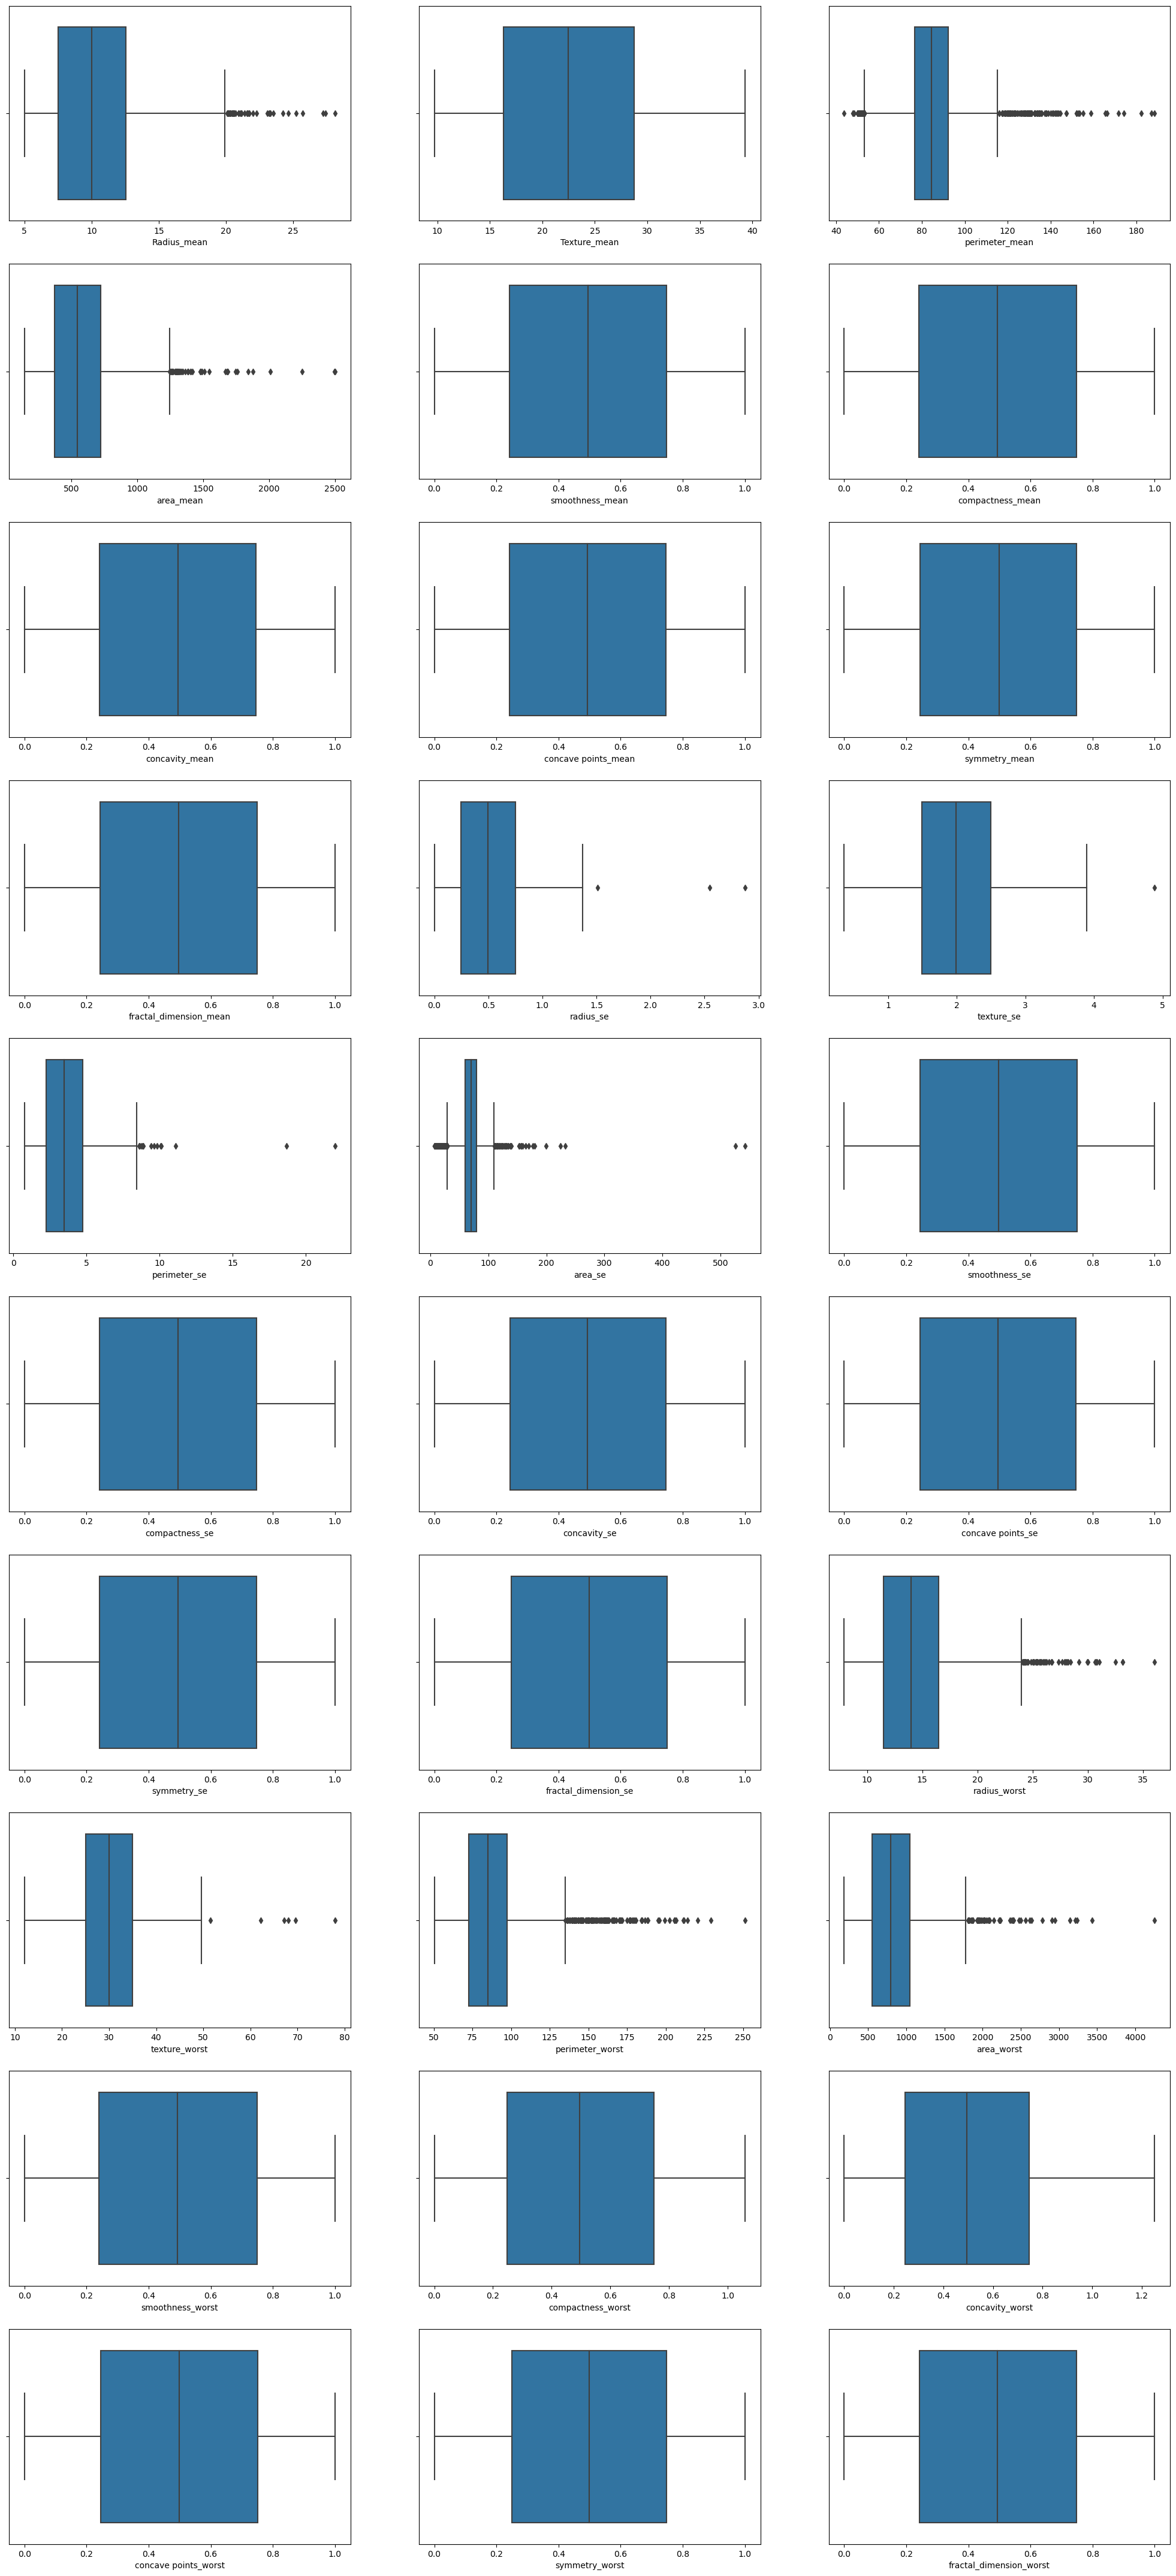

In [15]:
plt.figure(figsize = (25,55))
for i in range(1, len(cols_name)):
    plt.subplot(10, 3, i)
    sns.boxplot(data[cols_name[i]])
plt.show()

Yes, we thought right, There are outliers present
We will handle it with simple mathematics concept
## Bivariate Analysis
### Let's try to plot Corr

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

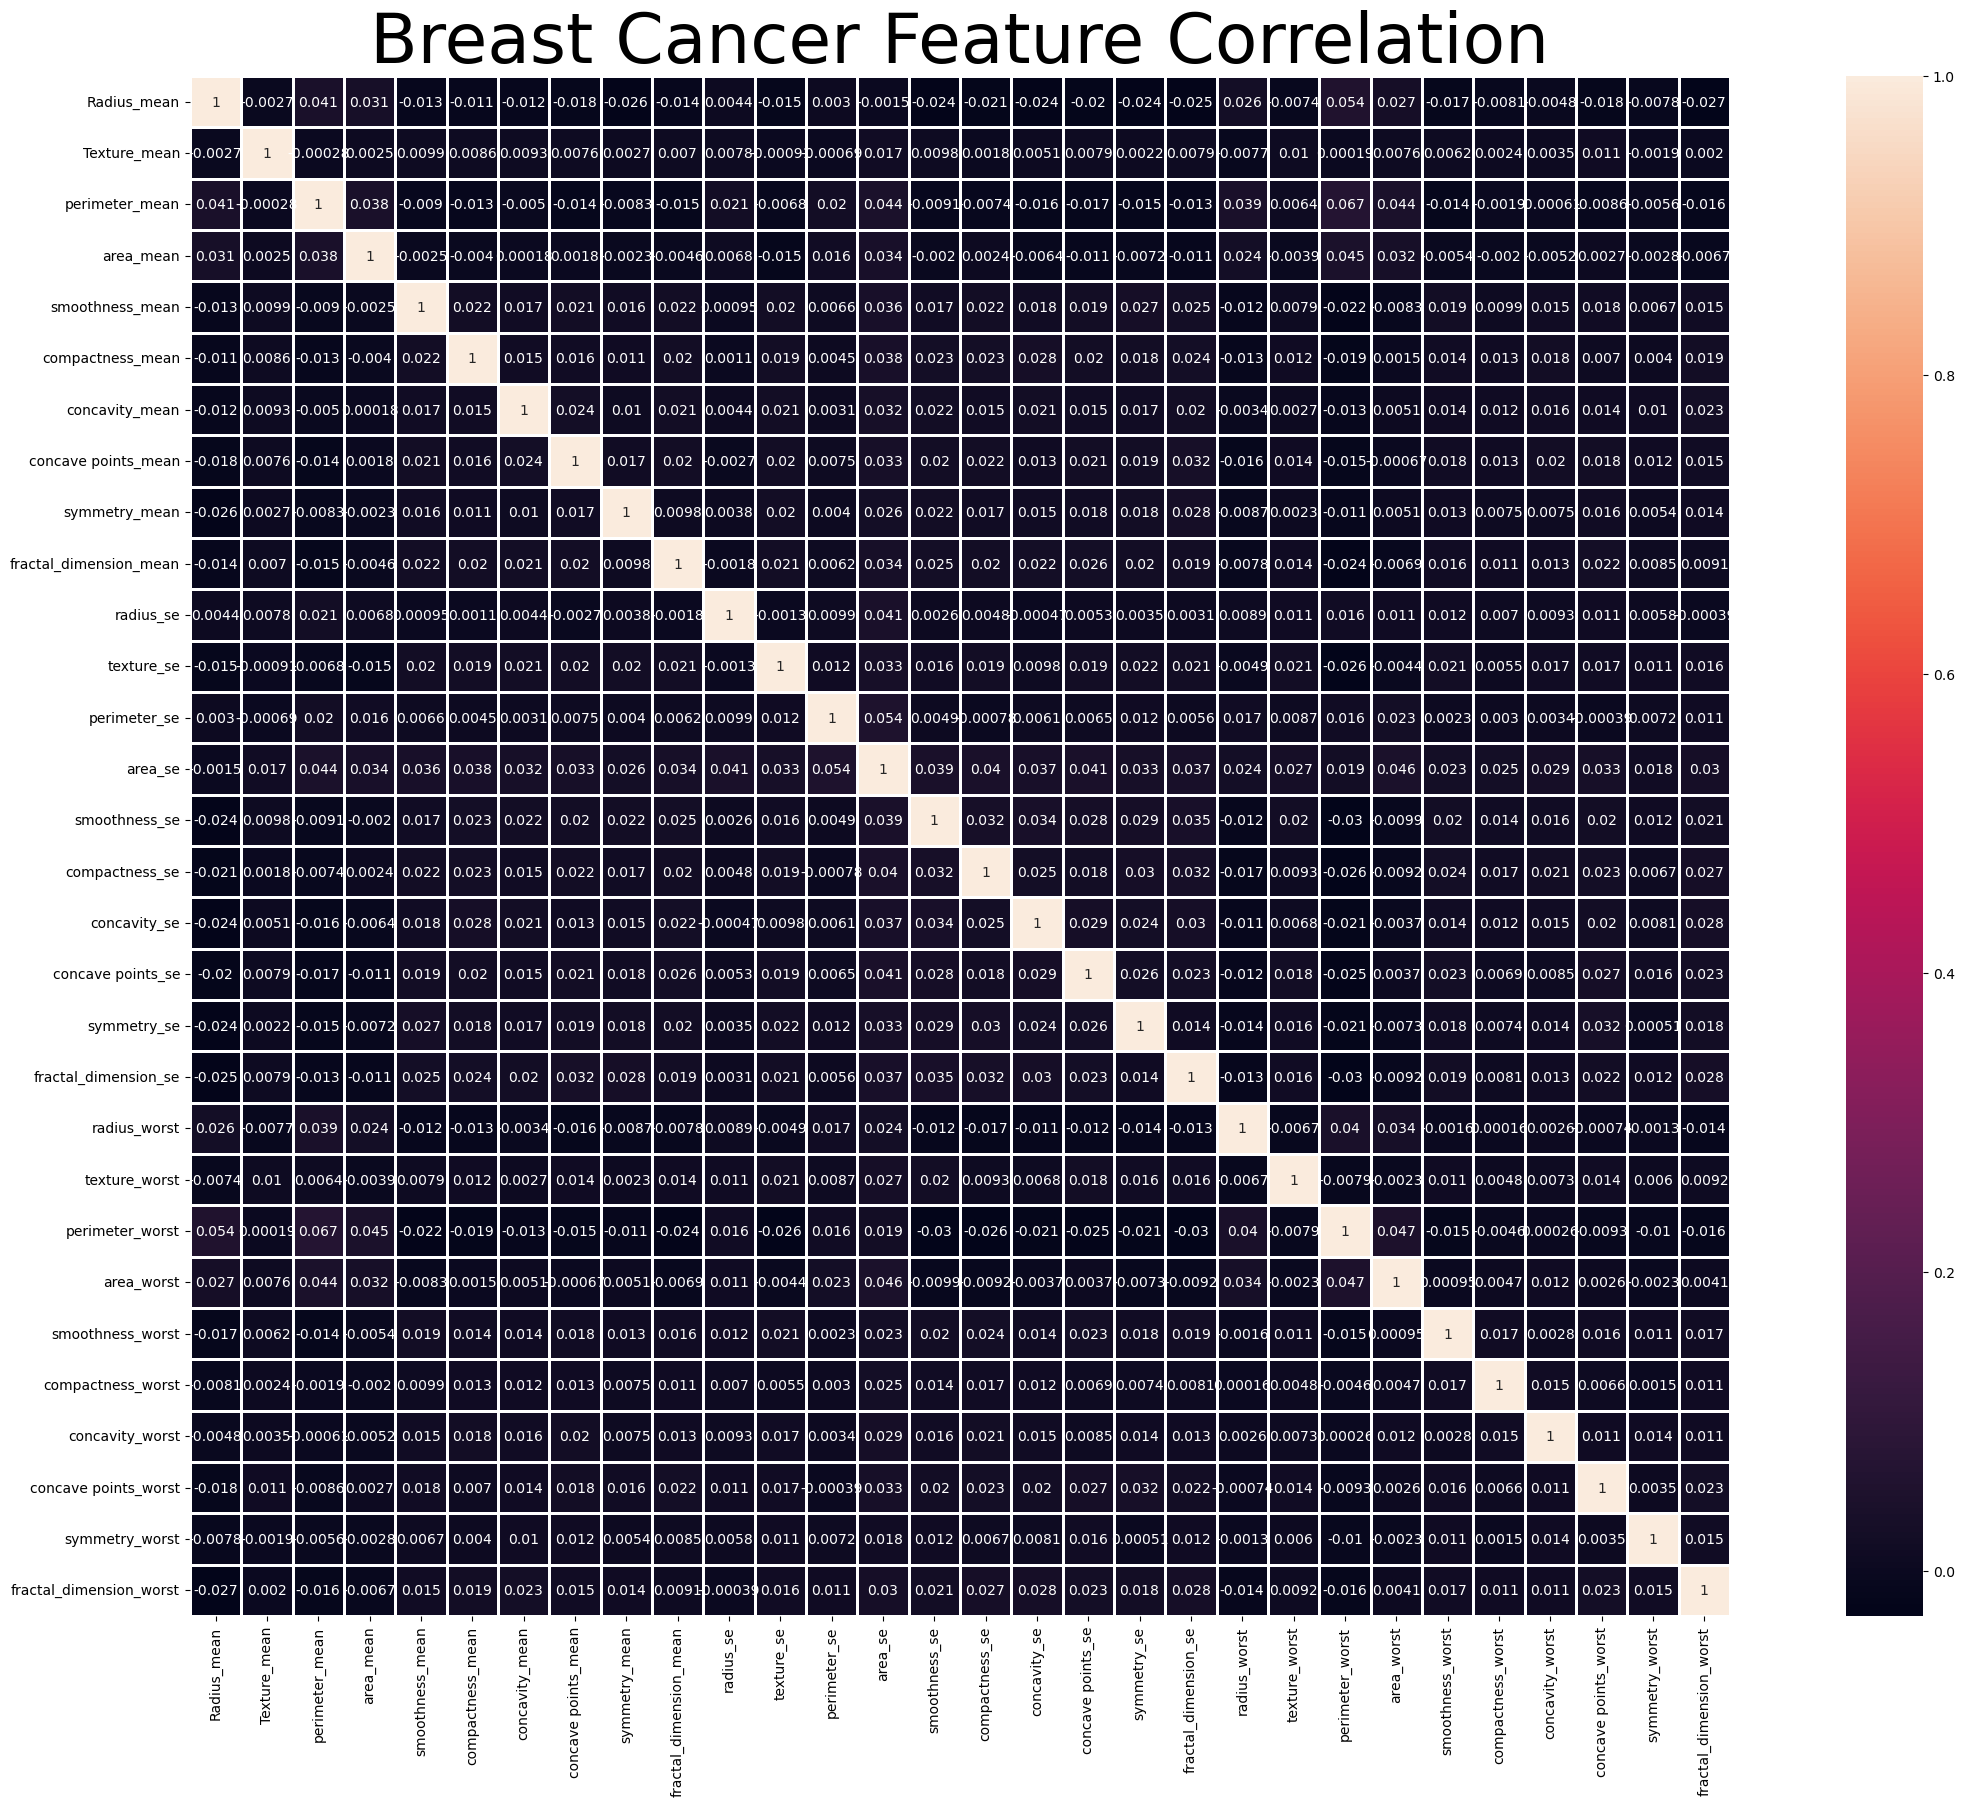

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 20))
plt.title('Breast Cancer Feature Correlation', fontsize=50, ha='center')
sns.heatmap(data[cols_name[1:]].corr(), annot=True, square='square', fmt='.2g',linewidths=2)

There are some features which are highly corr with each others

In [17]:
corr_matrix = data[cols_name[1:]].corr()
mask = corr_matrix >= 0.9
mask

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Radius_mean,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Texture_mean,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
perimeter_mean,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
area_mean,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


There are many 'False' values presents
Let's get all the columns pairs which are highly corr

In [18]:
corr_pairs = []
for column1 in cols_name[1:]:
    for column2 in cols_name[1:]:
        if corr_matrix[column1][column2] >= 0 and column1!=column2:
            pair = (column1, column2)
            if pair not in corr_pairs and pair[::-1] not in corr_pairs:
                corr_pairs.append(pair)
                
corr_pairs     

[('Radius_mean', 'perimeter_mean'),
 ('Radius_mean', 'area_mean'),
 ('Radius_mean', 'radius_se'),
 ('Radius_mean', 'perimeter_se'),
 ('Radius_mean', 'radius_worst'),
 ('Radius_mean', 'perimeter_worst'),
 ('Radius_mean', 'area_worst'),
 ('Texture_mean', 'area_mean'),
 ('Texture_mean', 'smoothness_mean'),
 ('Texture_mean', 'compactness_mean'),
 ('Texture_mean', 'concavity_mean'),
 ('Texture_mean', 'concave points_mean'),
 ('Texture_mean', 'symmetry_mean'),
 ('Texture_mean', 'fractal_dimension_mean'),
 ('Texture_mean', 'radius_se'),
 ('Texture_mean', 'area_se'),
 ('Texture_mean', 'smoothness_se'),
 ('Texture_mean', 'compactness_se'),
 ('Texture_mean', 'concavity_se'),
 ('Texture_mean', 'concave points_se'),
 ('Texture_mean', 'symmetry_se'),
 ('Texture_mean', 'fractal_dimension_se'),
 ('Texture_mean', 'texture_worst'),
 ('Texture_mean', 'perimeter_worst'),
 ('Texture_mean', 'area_worst'),
 ('Texture_mean', 'smoothness_worst'),
 ('Texture_mean', 'compactness_worst'),
 ('Texture_mean', 'conc

We can notice that the above mentioned pairs are highly correlated with pearson correlation value >= 0.
We can eliminate the columns that are highly correlated based on the correlation of the column with the target data.

In [19]:
cols = list(set([col for i in corr_pairs for col in i]))

for col in cols:
    print('{} : {}'.format(col, data[col].corr(data['feature_names'])))

symmetry_se : 0.0032516257958275802
Radius_mean : -0.0019267905620734035
smoothness_mean : 0.006892435616741499
area_se : 0.006049111281941791
radius_worst : -0.004789520249586087
compactness_se : 0.0012903249170977372
compactness_worst : 0.0012376152933919796
smoothness_worst : 0.0026255672285418414
perimeter_worst : -0.004580011319336242
fractal_dimension_se : -0.0013865370343537169
symmetry_worst : 0.0008227587755407397
concavity_se : 0.00290461057852096
concave points_se : -0.0022097991033775332
Texture_mean : 0.002615765180693165
fractal_dimension_mean : -0.003749664503229808
concavity_worst : -0.0041968767997867164
fractal_dimension_worst : -0.0039959011033324785
radius_se : -0.0008419542639894707
concave points_mean : 0.005354190934628159
smoothness_se : 0.0015353121830169651
area_mean : 0.010072449878437924
texture_se : -0.0030119981458570067
compactness_mean : -0.0027712526740760047
area_worst : -0.00450721925846031
texture_worst : 0.001850696533796521
symmetry_mean : 0.002256

In [20]:
list_col = [col for col in cols if data[col].corr(data['feature_names'])>=0]

In [21]:
list_col

['symmetry_se',
 'smoothness_mean',
 'area_se',
 'compactness_se',
 'compactness_worst',
 'smoothness_worst',
 'symmetry_worst',
 'concavity_se',
 'Texture_mean',
 'concave points_mean',
 'smoothness_se',
 'area_mean',
 'texture_worst',
 'symmetry_mean',
 'concave points_worst',
 'concavity_mean',
 'perimeter_mean',
 'perimeter_se']

We will keep only columns that have corr>=0 with 'diagnosis' column

In [22]:
for col in cols:
    if col not in list_col:
        data.drop(columns=col, inplace = True)
data.shape

(59999, 19)

In [23]:
data.head()


,feature_names,Texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,texture_worst,smoothness_worst,compactness_worst,concave points_worst,symmetry_worst
0,1,10.38,122.80,1001.0,0.11840,0.3001,0.14710,0.2419,8.589,153.40,0.006399,0.04904,0.05373,0.03003,17.33,0.1622,0.6656,0.2654,0.4601
1,1,21.77,132.90,1326.0,0.08474,0.0869,0.07017,0.1812,3.398,74.08,0.005225,0.01308,0.01860,0.01389,23.41,0.1238,0.1866,0.1860,0.2750
2,1,21.25,130.00,1203.0,0.10960,0.1974,0.12790,0.2069,4.585,94.03,0.006150,0.04006,0.03832,0.02250,25.53,0.1444,0.4245,0.2430,0.3613
3,0,20.38,77.58,386.1,0.14250,0.2414,0.10520,0.2597,3.445,27.23,0.009110,0.07458,0.05661,0.05963,26.50,0.2098,0.8663,0.2575,0.6638
4,1,14.34,135.10,1297.0,0.10030,0.1980,0.10430,0.1809,5.438,94.44,0.011490,0.02461,0.05688,0.01756,16.67,0.1374,0.2050,0.1625,0.2364


In [24]:
X = data[data.columns[1:]]
y = data['feature_names']

## Without handle Outliers and Data Imbalanced
### Since we have algorithms available which are not sensitive to outliers and/or data imbalanced

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)

## Random - Forest Classifier

Accuracy on Whole Data: 90.00150002500041%
Precision Score: 0.9080765687378441
Recall Score: 0.8895313857878201
F1 Score: 0.8987083157450401


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


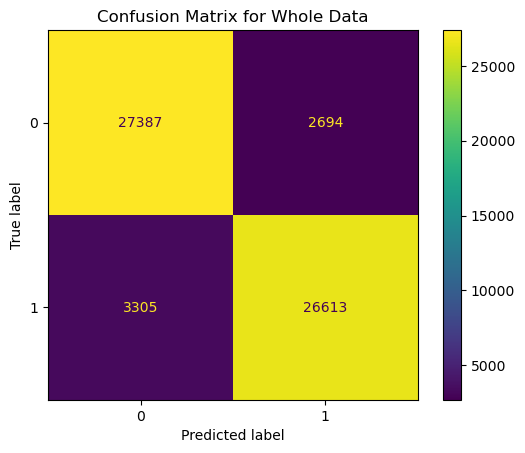

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     30081
           1       0.91      0.89      0.90     29918

    accuracy                           0.90     59999
   macro avg       0.90      0.90      0.90     59999
weighted avg       0.90      0.90      0.90     59999



In [27]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)



# Accuracy On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(rf_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

## XgBoost Classifier

Accuracy on Whole Data: 70.46117435290589%
Precision Score: 0.7081271119909889
Recall Score: 0.6934287051273481
F1 Score: 0.7007008359368403


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


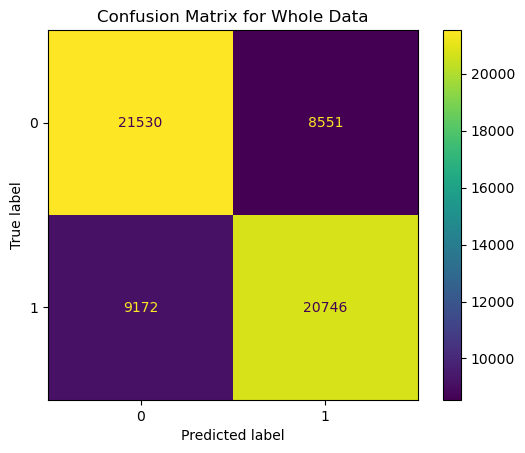

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     30081
           1       0.71      0.69      0.70     29918

    accuracy                           0.70     59999
   macro avg       0.70      0.70      0.70     59999
weighted avg       0.70      0.70      0.70     59999



In [35]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 42))
xgb_pipeline.fit(X_train, y_train)



# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y, predictions))

## Logistic Regression

Accuracy on Whole Data: 50.57417623627061%
Precision Score: 0.505733094999346
Recall Score: 0.38772645230296143
F1 Score: 0.4389367136505534


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


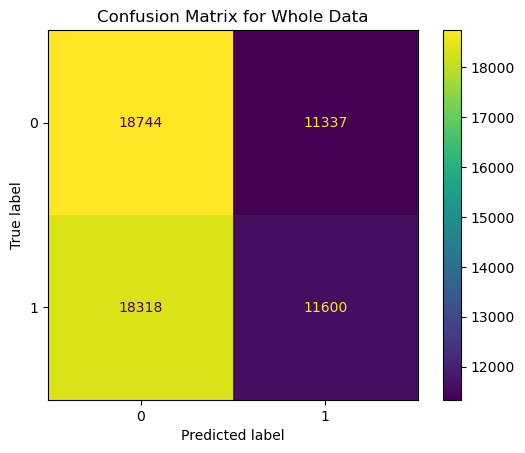

              precision    recall  f1-score   support

           0       0.51      0.62      0.56     30081
           1       0.51      0.39      0.44     29918

    accuracy                           0.51     59999
   macro avg       0.51      0.51      0.50     59999
weighted avg       0.51      0.51      0.50     59999



In [36]:
from sklearn.linear_model import LogisticRegression

# Create a pipeline with StandardScaler and LogisticRegression
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=18))

# Fit the pipeline on the training data
lr_pipeline.fit(X_train, y_train)



# Evaluate the pipeline on the whole data
predictions = lr_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y,predictions)}")
print(f"F1 Score: {f1_score(y,predictions)}")
plot_confusion_matrix(lr_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y,predictions))

## Decision Tree

Accuracy on Whole Data: 89.84483074717912%
Precision Score: 0.8989584379918952
Recall Score: 0.8971856407513871
F1 Score: 0.8980711644947053


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


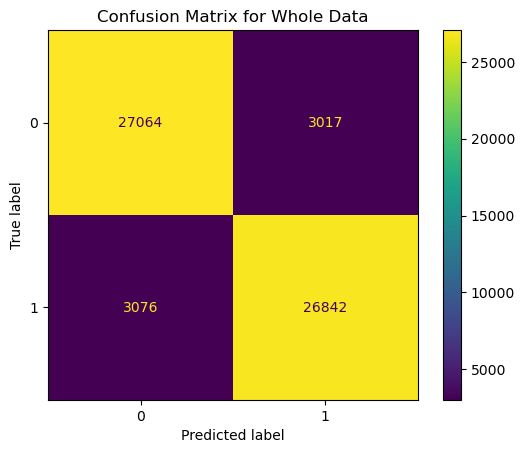

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     30081
           1       0.90      0.90      0.90     29918

    accuracy                           0.90     59999
   macro avg       0.90      0.90      0.90     59999
weighted avg       0.90      0.90      0.90     59999



In [37]:
#decision tree                                                                                                                                                                                                                                  from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

# create pipeline with standard scaler and decision tree classifier
dt_pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=18))

# fit the pipeline to the training data
dt_pipeline.fit(X_train, y_train)



# evaluate the model on the whole data
predictions = dt_pipeline.predict(X.values)
accuracy = accuracy_score(y,predictions)
precision = precision_score(y,predictions)
recall = recall_score(y,predictions)
f1 = f1_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")
plot_confusion_matrix(dt_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y,predictions))

## K- Nearest Neighbor

C:\Users\sushm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on Whole Data: 64.93941565692761%
Precision Score: 0.650624067290734
Recall Score: 0.6411859081489404
F1 Score: 0.6458705094104575


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sushm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


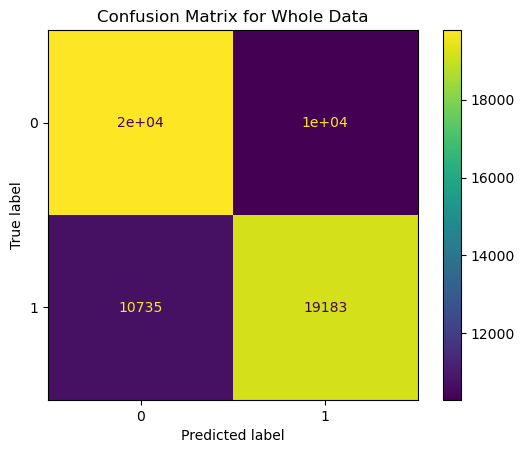

              precision    recall  f1-score   support

           0       0.65      0.66      0.65     30081
           1       0.65      0.64      0.65     29918

    accuracy                           0.65     59999
   macro avg       0.65      0.65      0.65     59999
weighted avg       0.65      0.65      0.65     59999



In [38]:
#KNN                                                                                                                                                                                                                                               from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Create a KNN pipeline with standardization
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Evaluate the KNN model on whole data
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y,predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y,predictions)}")
print(f"Recall Score: {recall_score(y,predictions)}")
print(f"F1 Score: {f1_score(y,predictions)}")
plot_confusion_matrix(knn_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y,predictions))

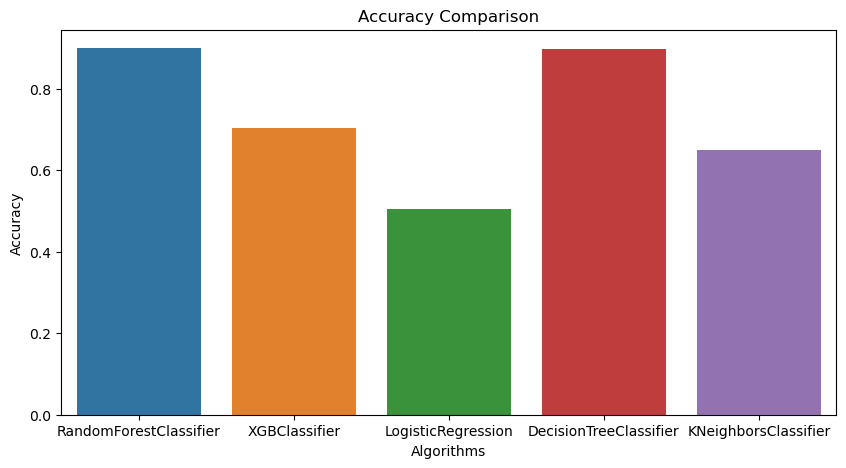

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and corresponding accuracies
model = ['RandomForestClassifier', 'XGBClassifier', 'LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier']

acc = [0.90001,0.70461,0.50574,0.89844,0.64939]

# Plot the barplot
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=acc)
plt.show()


In [43]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

RandomForestClassifier --> 90.001
XGBClassifier --> 70.461
LogisticRegression --> 50.574
DecisionTreeClassifier --> 89.84400000000001
KNeighborsClassifier --> 64.93900000000001


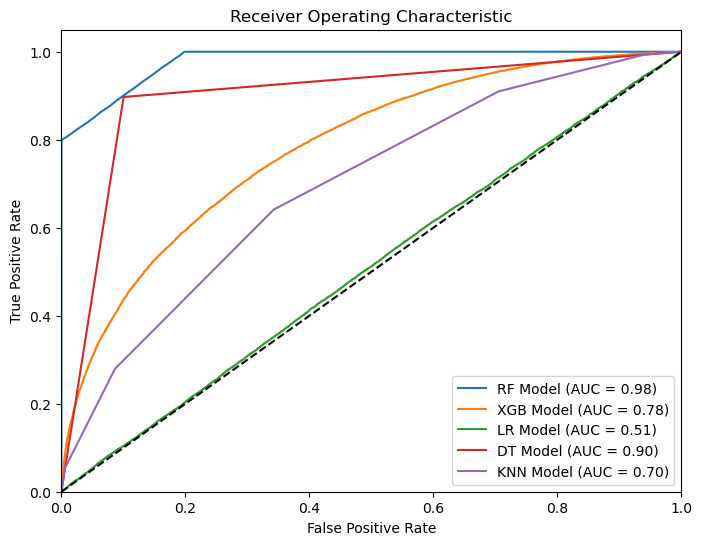

In [52]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the true labels
y_true = y  # Replace with your true labels

# Define the predicted probabilities for each model
proba_model1 = rf_pipeline.predict_proba(X.values)[:, 1]  # Replace with the appropriate model and input data
proba_model2 = xgb_pipeline.predict_proba(X.values)[:, 1]  # Replace with the appropriate model and input data
proba_model3 = lr_pipeline.predict_proba(X.values)[:, 1]  # Replace with the appropriate model and input data
proba_model4 = dt_pipeline.predict_proba(X.values)[:, 1]  # Replace with the appropriate model and input data
proba_model5 = knn_pipeline.predict_proba(X.values)[:, 1]  # Replace with the appropriate model and input data

# Compute the false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC) for each model
fpr1, tpr1, _ = roc_curve(y_true, proba_model1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_true, proba_model2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_true, proba_model3)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_true, proba_model4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_true, proba_model5)
roc_auc5 = auc(fpr5, tpr5)

# Plot the ROC curve for each model
plt.figure(figsize=[8, 6])
plt.plot(fpr1, tpr1, label=f'RF Model (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'XGB Model (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'LR Model (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'DT Model (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'KNN Model (AUC = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# ARTIFICIAL NEURAL NETWORKS

## Back Propagation Neural Network

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 1.8609 - accuracy: 0.5000 - val_loss: 0.7139 - val_accuracy: 0.4965
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7428 - accuracy: 0.5011 - val_loss: 0.8283 - val_accuracy: 0.5027
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7362 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.5019
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7373 - accuracy: 0.5002 - val_loss: 0.7221 - val_accuracy: 0.5013
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7313 - accuracy: 0.4986 - val_loss: 0.7063 - val_accuracy: 0.4976
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7291 - accuracy: 0.4970 - val_loss: 0.7019 - val_accuracy: 0.5024
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7302 - accuracy: 0.4987 - val_loss: 0.6945 - val_accuracy:

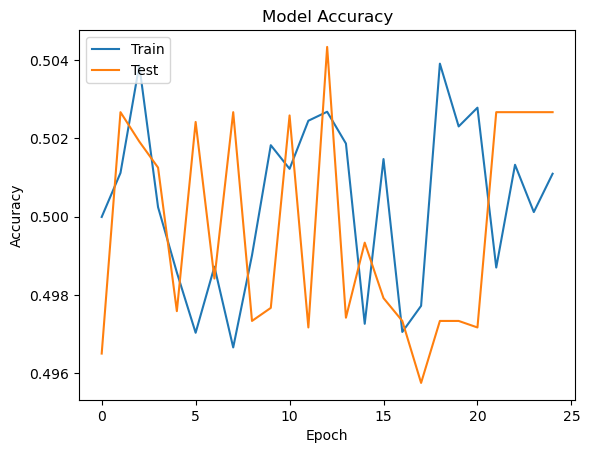

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on Test Data: {accuracy*100}%")
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Multi Layer Perceptron

Accuracy on Whole Data: 57.294288238137305%
Precision Score: 0.5899551794914757
Recall Score: 0.47075339260645765
F1 Score: 0.5236563737428194


C:\Users\sushm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


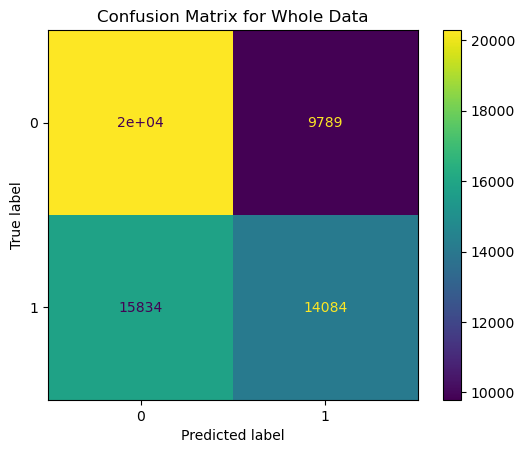

              precision    recall  f1-score   support

           0       0.56      0.67      0.61     30081
           1       0.59      0.47      0.52     29918

    accuracy                           0.57     59999
   macro avg       0.58      0.57      0.57     59999
weighted avg       0.58      0.57      0.57     59999



In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_confusion_matrix

# Create an MLP pipeline with standardization
mlp_pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=18))

# Train the MLP model
mlp_pipeline.fit(X_train, y_train)


# Accuracy on whole data
predictions = mlp_pipeline.predict(X.values)
accuracy = accuracy_score(y,predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y,predictions)}")
print(f"Recall Score: {recall_score(y,predictions)}")
print(f"F1 Score: {f1_score(y,predictions)}")
plot_confusion_matrix(mlp_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()
print(classification_report(y,predictions))

## Comparison Between Neural Networks

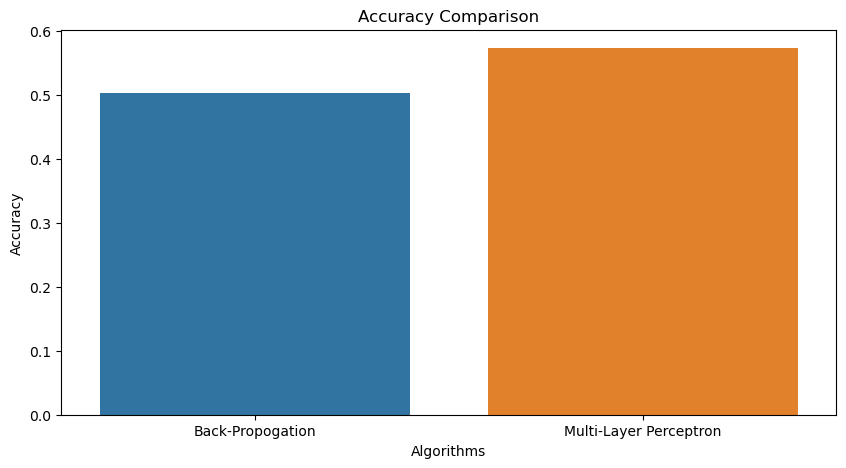

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and corresponding accuracies
model = ['Back-Propogation', 'Multi-Layer Perceptron']
acc = [0.5026666522026062, 0.57294288238137305]

# Plot the barplot
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=acc)
plt.show()


## Total Accuracy Comparisons of all the Models

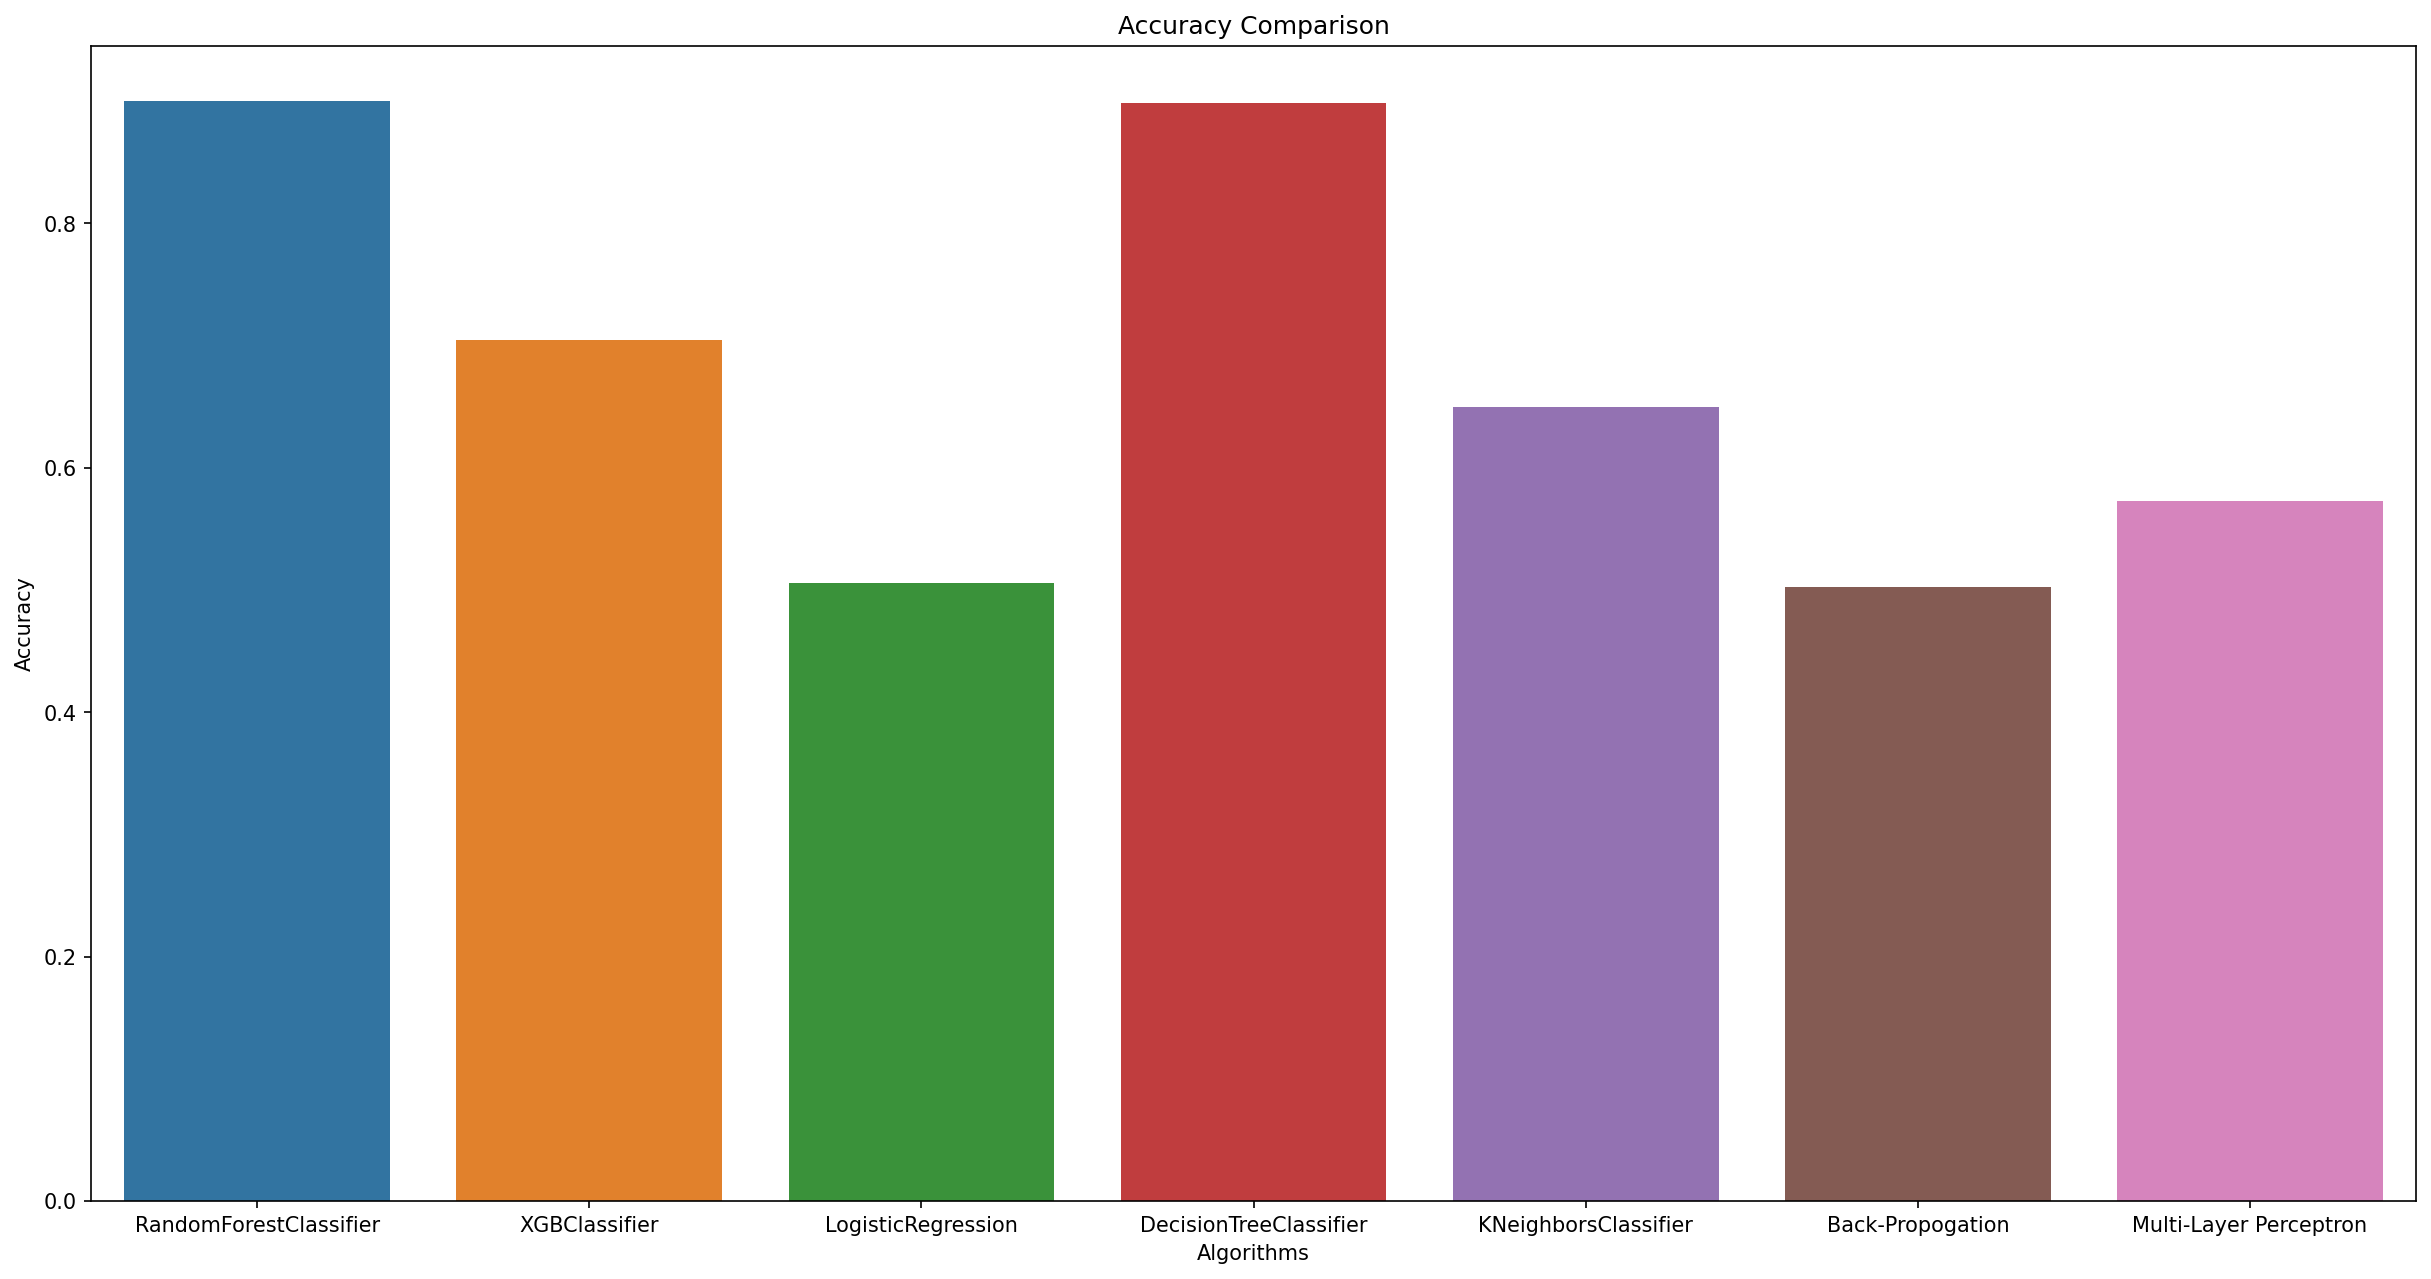

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and corresponding accuracies
model = ['RandomForestClassifier', 'XGBClassifier', 'LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier',
'Back-Propogation', 'Multi-Layer Perceptron']
acc = [0.90001,0.70461,0.50574,0.89844,0.64939,0.5026666522026062, 0.57294288238137305]

# Plot the barplot
plt.figure(figsize=[20, 10], dpi=150)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(x=model, y=acc)
plt.show()
